# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Data_clustering.csv')
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Cluster
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,Y,Y,N,8.7,N,Y,Y,N,Y,0
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,Y,Y,N,9.6,Y,N,N,Y,Y,1
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,Y,4.0,N,Y,N,N,N,1
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,Y,N,N,7.6,N,Y,N,Y,N,1
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,Y,N,N,3.5,N,Y,Y,N,Y,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop(columns=['Dry Eye Disease'])  
y = df['Dry Eye Disease']   
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran Data Latih (X_train):", X_train.shape)
print("Ukuran Data Uji (X_test):", X_test.shape)
print("Ukuran Label Latih (y_train):", y_train.shape)
print("Ukuran Label Uji (y_test):", y_test.shape)


Ukuran Data Latih (X_train): (16000, 1620)
Ukuran Data Uji (X_test): (4000, 1620)
Ukuran Label Latih (y_train): (16000,)
Ukuran Label Uji (y_test): (4000,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
train_accuracy = model_rf.score(X_train, y_train)
print("Akurasi pada data latih:", round(train_accuracy * 100, 2), "%")

Akurasi pada data latih: 100.0 %


Sebelum melatih model, data yang berisi tulisan seperti 'Male' dan 'Female' pada kolom Gender harus diubah menjadi angka karena model hanya bisa membaca angka. Setelah itu, data dibagi rata menjadi dua bagian: satu untuk melatih model (data train) dan satu lagi untuk menguji hasilnya (data test). Supaya target prediksinya pas, label (y_train) juga disesuaikan menjadi bentuk satu baris data. Selanjutnya, dibuat model Random Forest, yaitu model yang bekerja dengan membuat banyak pohon keputusan untuk menghasilkan prediksi yang lebih kuat. Model ini dilatih menggunakan data train, dan kalau berhasil, berarti model sudah siap untuk dipakai memprediksi data baru.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [5]:

# 1. Lakukan prediksi dengan data uji
y_pred = model_rf.predict(X_test)

# 2. Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # pakai 'weighted' karena multiclass
report = classification_report(y_test, y_pred)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Cetak hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', cm)


Akurasi: 0.70
F1-Score: 0.65
Classification Report:
               precision    recall  f1-score   support

           N       0.69      0.25      0.37      1393
           Y       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.69      0.59      0.58      4000
weighted avg       0.70      0.70      0.65      4000

Confusion Matrix:
 [[ 347 1046]
 [ 158 2449]]


Kita lakukan prediksi hasil dari x_test lalu diukur ke akuratan model dengan accurancy dan F1-score dengan melihat hasil classification report dan membuat confusion matrix untuk mengetahui prediksi apakah bernilai bnar atau salah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definisikan model dasar
rf = RandomForestClassifier(random_state=42)

# Definisikan parameter grid (disederhanakan dan efisien)
param_grid = {
    'n_estimators': [100, 150, 200],         # Jumlah pohon
    'max_depth': [None, 10, 20],             # Kedalaman pohon
    'min_samples_split': [2, 5],             # Min sampel utk split node
    'min_samples_leaf': [1, 2],              # Min sampel utk jadi daun
    'max_features': ['sqrt', 'log2']         # Fitur yang dipakai tiap split
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,                   # Coba 10 kombinasi acak saja (cepat)
    cv=3,                        # 3-fold cross validation (lebih ringan)
    scoring='accuracy',
    n_jobs=-1,                   # Gunakan semua core CPU
    verbose=2,
    random_state=42
)

# Jalankan pencarian
random_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Score (Cross-Validation Accuracy):", round(random_search.best_score_ * 100, 2), "%")

# Model terbaik
best_model = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Score (Cross-Validation Accuracy): 69.68 %


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Akurasi setelah tuning: 0.70
F1-Score setelah tuning: 0.65
Classification Report setelah tuning:
               precision    recall  f1-score   support

           N       0.69      0.25      0.37      1393
           Y       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.70      0.60      0.59      4000
weighted avg       0.70      0.70      0.65      4000

Confusion Matrix setelah tuning:
 [[ 354 1039]
 [ 159 2448]]


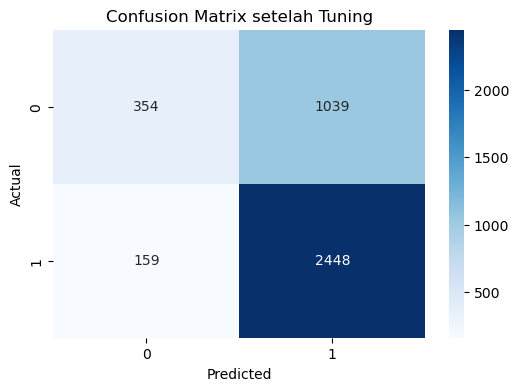

In [10]:
# 1. Gunakan model terbaik dari hasil tuning
tuned_model = best_model

# 2. Lakukan prediksi pada data uji
y_pred_tuned = tuned_model.predict(X_test)

# 3. Hitung metrik evaluasi
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
report_tuned = classification_report(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# 4. Cetak hasil evaluasi
print(f"Akurasi setelah tuning: {accuracy_tuned:.2f}")
print(f"F1-Score setelah tuning: {f1_tuned:.2f}")
print('Classification Report setelah tuning:\n', report_tuned)
print('Confusion Matrix setelah tuning:\n', cm_tuned)

# (Opsional) Visualisasi Confusion Matrix (biar lebih informatif)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix setelah Tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**1. Perbandingan Hasil Evaluasi**
| Metrik           | Sebelum Tuning                                  | Setelah Tuning |
| ---------------- | ----------------------------------------------- | -------------- |
| Akurasi          | 70.00%                                          | 70.00%         |
| F1-Score         | 65.00%                                          | 65.00%         |
| Macro F1-Score   | 58.00%                                          | 59.00%         |
| Catatan Tambahan | Tidak ada peningkatan signifikan setelah tuning |                |


**2. Identifikasi Kelemahan Model**
- Precision / Recall rendah pada kelas N (Non-Dry Eye Disease):

  - Recall untuk kelas N sangat rendah (25%), artinya banyak data N yang diprediksi salah sebagai Y.

- Overfitting atau Underfitting:
   - Tidak ada overfitting (akurasi training dan testing serupa)
   - Indikasi underfitting pada kelas N (model kesulitan mempelajari pola kelas N)

- Confusion Matrix menunjukkan:
  - Banyak False Negative → kelas N diprediksi sebagai Y sebanyak ~1046–1039 kasus.

**3. Rekomendasi Tindakan Lanjutan**
- Kumpulkan data tambahan khusus untuk kelas N agar model lebih seimbang.
- Coba algoritma lain seperti XGBoost atau Balanced Random Forest yang lebih tahan terhadap imbalance data.
- Gunakan balancing technique seperti SMOTE atau undersampling pada data pelatihan.
- Lakukan feature engineering → periksa apakah ada fitur yang bisa menambah informasi penting untuk membedakan kelas N dan Y.

Setelah dilakukan evaluasi sebelum dan sesudah tuning, terlihat bahwa performa model tidak mengalami peningkatan yang signifikan dari segi akurasi dan F1-score. Model menunjukkan performa baik untuk memprediksi kelas Y (Recall 94%), namun performa pada kelas N masih rendah.
Diperlukan pendekatan balancing data atau model alternatif untuk meningkatkan generalisasi model pada kedua kelas secara merata.

# 5. Mengekspor Data
Mengekspor data klasifiksi ke csv

In [11]:
hasil_klasifikasi = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Menyimpan ke file CSV
hasil_klasifikasi.to_csv('Data_klasifikasi.csv', index=False)

print("Data hasil klasifikasi berhasil diekspor ke 'Data_klasifikasi.csv'")

Data hasil klasifikasi berhasil diekspor ke 'Data_klasifikasi.csv'
